In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [36]:
data = pd.read_csv("./data/wine_train.csv")
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
1,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
2,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
3,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
102,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510
103,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
104,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463


In [37]:
data['와인_종류'].value_counts()

와인_종류
2    42
1    35
3    29
Name: count, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   와인_종류                   106 non-null    int64  
 1   알코올_도수                  106 non-null    float64
 2   사과산_함량                  106 non-null    float64
 3   재_함량                    106 non-null    float64
 4   재의_알칼리도                 106 non-null    float64
 5   마그네슘_함량                 106 non-null    int64  
 6   총_페놀_함량                 106 non-null    float64
 7   플라보노이드_함량               106 non-null    float64
 8   비플라보노이드_페놀_함량           106 non-null    float64
 9   프로안토시아닌_함량              106 non-null    float64
 10  색_강도                    106 non-null    float64
 11  색조                      106 non-null    float64
 12  희석_와인의_투과율_OD280_OD315  106 non-null    float64
 13  프롤린_함량                  106 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.

<Axes: >

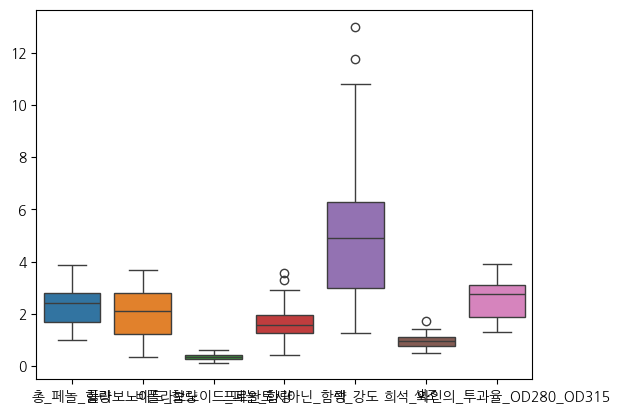

In [39]:
sns.boxplot(data.iloc[:,6:-1])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [41]:
X = data.drop('와인_종류', axis=1)
y = data['와인_종류']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.4, stratify=y, random_state=42)

In [43]:
ss = StandardScaler()
train_temp = ss.fit_transform(X_train)
test_temp = ss.fit_transform(X_valid)
ss_X_train = pd.DataFrame(train_temp, columns= X_train.columns, index= X_train.index)
ss_X_test = pd.DataFrame(valid_temp, columns= X_valid.columns, index= X_valid.index)

NameError: name 'X_valid' is not defined

스케일러 민 맥스로

In [44]:
mms = MinMaxScaler()
train_temp = mms.fit_transform(X_train)
test_temp = mms.transform(X_test)
mms_X_train = pd.DataFrame(train_temp, columns= X_train.columns, index= X_train.index)
mms_X_test = pd.DataFrame(test_temp, columns= X_test.columns, index= X_test.index)

# mms 변수에 있는 MinMaxScaler 가중치 저장
# joblib
* joblib.dump(경로, 파일명)
* joblib.load(경로, 파일명) 

In [45]:
import joblib

In [46]:
joblib.dump(mms, "./model/MinMax_info.joblib")

['./model/MinMax_info.joblib']

In [47]:
mms_X_train

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
77,0.476316,0.418033,0.672043,0.817073,0.217949,0.411538,0.034375,0.795918,0.136364,0.310580,0.333333,0.316602,0.252223
20,0.207895,0.163934,0.279570,0.542683,0.025641,0.480769,0.359375,0.469388,0.349650,0.066553,0.373984,0.428571,0.110752
24,0.644737,0.153689,0.688172,0.725610,0.064103,0.519231,0.190625,0.775510,0.653846,0.893345,0.073171,0.173745,0.276475
85,0.507895,0.518443,0.532258,0.481707,0.282051,0.053846,0.065625,0.530612,0.181818,0.341297,0.162602,0.162162,0.320938
32,0.684211,0.182377,0.720430,0.402439,0.358974,0.615385,0.756250,0.326531,0.363636,0.513652,0.650407,0.598456,0.834276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.539474,0.610656,0.537634,0.664634,0.371795,0.061538,0.281250,0.408163,0.251748,0.692833,0.073171,0.000000,0.219887
80,0.423684,0.090164,0.354839,0.378049,0.205128,0.296154,0.287500,0.795918,0.069930,0.381399,0.406504,0.100386,0.139046
33,0.621053,0.174180,0.677419,0.335366,0.115385,0.615385,0.765625,0.408163,0.360140,0.300341,0.357724,0.729730,0.741310
9,1.000000,0.147541,0.435484,0.207317,0.166667,0.596154,0.778125,0.306122,0.545455,0.334471,0.487805,0.586873,0.620049


In [48]:
mms_X_test

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
40,0.331579,0.461066,0.456989,0.451220,0.051282,0.615385,0.781250,0.632653,0.835664,0.087031,0.764228,0.579151,0.103476
96,0.273684,0.254098,0.435484,0.634146,0.012821,0.519231,0.675000,0.469388,0.325175,0.126280,0.308943,0.752896,0.080841
82,0.834211,0.172131,0.586022,0.280488,0.358974,0.776923,0.906250,0.408163,0.541958,0.466724,0.463415,0.586873,0.947454
71,0.578947,0.487705,0.494624,0.481707,0.179487,0.211538,0.106250,0.959184,0.506993,0.788396,0.065041,0.069498,0.320938
78,0.650000,0.450820,0.677419,0.817073,0.500000,0.057692,0.337500,0.163265,0.290210,0.624573,0.089431,-0.011583,0.179466
90,0.839474,0.159836,0.505376,0.347561,0.435897,0.750000,0.784375,0.244898,0.562937,0.435154,0.373984,0.764479,0.559418
68,0.276316,0.096311,0.612903,0.725610,0.000000,0.503846,0.562500,0.591837,0.216783,0.138225,0.365854,0.718147,0.086500
19,0.113158,0.577869,0.247312,0.542683,0.294872,0.742308,0.653125,0.204082,1.104895,0.138225,0.219512,0.571429,0.229588
42,0.352632,0.059426,0.645161,0.457317,0.179487,0.450000,0.675000,0.469388,0.580420,0.283276,0.577236,0.374517,0.323363
35,0.244737,0.034836,0.505376,0.634146,0.217949,0.819231,0.515625,-0.020408,0.430070,0.164676,0.414634,0.694981,0.491512


In [49]:
y_train.value_counts()

와인_종류
2    25
1    21
3    17
Name: count, dtype: int64

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [51]:
y_train.shape

(63,)

y 원핫인코딩 배먹음

In [52]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [15]:
mms_X_test

,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
40,0.331579,0.461066,0.456989,0.451220,0.051282,0.615385,0.781250,0.632653,0.835664,0.087031,0.764228,0.579151,0.103476
96,0.273684,0.254098,0.435484,0.634146,0.012821,0.519231,0.675000,0.469388,0.325175,0.126280,0.308943,0.752896,0.080841
82,0.834211,0.172131,0.586022,0.280488,0.358974,0.776923,0.906250,0.408163,0.541958,0.466724,0.463415,0.586873,0.947454
71,0.578947,0.487705,0.494624,0.481707,0.179487,0.211538,0.106250,0.959184,0.506993,0.788396,0.065041,0.069498,0.320938
78,0.650000,0.450820,0.677419,0.817073,0.500000,0.057692,0.337500,0.163265,0.290210,0.624573,0.089431,-0.011583,0.179466
90,0.839474,0.159836,0.505376,0.347561,0.435897,0.750000,0.784375,0.244898,0.562937,0.435154,0.373984,0.764479,0.559418
68,0.276316,0.096311,0.612903,0.725610,0.000000,0.503846,0.562500,0.591837,0.216783,0.138225,0.365854,0.718147,0.086500
19,0.113158,0.577869,0.247312,0.542683,0.294872,0.742308,0.653125,0.204082,1.104895,0.138225,0.219512,0.571429,0.229588
42,0.352632,0.059426,0.645161,0.457317,0.179487,0.450000,0.675000,0.469388,0.580420,0.283276,0.577236,0.374517,0.323363
35,0.244737,0.034836,0.505376,0.634146,0.217949,0.819231,0.515625,-0.020408,0.430070,0.164676,0.414634,0.694981,0.491512


In [53]:
model = Sequential()
model.add(Input(shape=(mms_X_test.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
import os

Epoch 1/1000


I0000 00:00:1747295158.915182  103453 service.cc:152] XLA service 0x7f4c38005170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747295158.915238  103453 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-15 16:45:58.936870: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747295159.086203  103453 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - accuracy: 0.2188 - loss: 1.1369

I0000 00:00:1747295161.039351  103453 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2422 - loss: 1.1303 - val_accuracy: 0.2791 - val_loss: 1.1098
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3158 - loss: 1.1004 - val_accuracy: 0.4884 - val_loss: 1.0859
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.4524 - loss: 1.0728 - val_accuracy: 0.5581 - val_loss: 1.0631
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5895 - loss: 1.0562 - val_accuracy: 0.6279 - val_loss: 1.0413
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.6635 - loss: 1.0355 - val_accuracy: 0.6744 - val_loss: 1.0207
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.7684 - loss: 1.0072 - val_accuracy: 0.7442 - val_loss: 1.0007
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7791 - loss: 0.9847 - val_accuracy: 0.7674 - val_loss: 0.9803
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8209 - loss: 0.9613 - val_accuracy: 0.7907 - val_loss:

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9788 - loss: 0.2067 - val_accuracy: 0.9767 - val_loss: 0.2313
Epoch 52/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.9684 - loss: 0.2027 - val_accuracy: 0.9767 - val_loss: 0.2227
Epoch 53/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9790 - loss: 0.2032 - val_accuracy: 0.9767 - val_loss: 0.2157
Epoch 54/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9790 - loss: 0.2044 - val_accuracy: 0.9767 - val_loss: 0.2082
Epoch 55/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9790 - loss: 0.1903 - val_accuracy: 0.9767 - val_loss: 0.2017
Epoch 56/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.9790 - loss: 0.1790 - val_accuracy: 0.9767 - val_loss: 0.1956
Epoch 57/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9790 - loss: 0.1706 - val_accuracy: 0.9767 - val_loss: 0.1900
Epoch 58/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.9894 - loss: 0.1599 - val_accuracy: 0.9767 -

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 0.0421 - val_accuracy: 0.9767 - val_loss: 0.0959
Epoch 102/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 1.0000 - loss: 0.0436 - val_accuracy: 0.9767 - val_loss: 0.0945
Epoch 103/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 1.0000 - loss: 0.0470 - val_accuracy: 0.9767 - val_loss: 0.0936
Epoch 104/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 0.9767 - val_loss: 0.0932
Epoch 105/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 0.0417 - val_accuracy: 0.9767 - val_loss: 0.0926
Epoch 106/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 0.0437 - val_accuracy: 0.9767 - val_loss: 0.0924
Epoch 107/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 1.0000 - loss: 0.0408 - val_accuracy: 0.9767 - val_loss: 0.0908
Epoch 108/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 1.0000 - loss: 0.0411 - val_accuracy: 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 0.9767 - val_loss: 0.0737
Epoch 152/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 0.9767 - val_loss: 0.0731
Epoch 153/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 0.9767 - val_loss: 0.0732
Epoch 154/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 0.9767 - val_loss: 0.0727
Epoch 155/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 0.9767 - val_loss: 0.0733
Epoch 156/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 0.9767 - val_loss: 0.0729
Epoch 157/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.9767 - val_loss: 0.0721
Epoch 158/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 1.0000 - loss: 0.0143 - val_accuracy: 0.9

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.9767 - val_loss: 0.0682
Epoch 202/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.9767 - val_loss: 0.0689
Epoch 203/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.9767 - val_loss: 0.0688
Epoch 204/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.9767 - val_loss: 0.0686
Epoch 205/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.9767 - val_loss: 0.0687
Epoch 206/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9767 - val_loss: 0.0683
Epoch 207/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.9767 - val_loss: 0.0677
Epoch 208/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.9767 -

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9767 - val_loss: 0.0673
Epoch 252/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9767 - val_loss: 0.0670
Epoch 253/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9767 - val_loss: 0.0672
Epoch 254/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9767 - val_loss: 0.0673
Epoch 255/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9767 - val_loss: 0.0674
Epoch 256/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9767 - val_loss: 0.0670
Epoch 257/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9767 - val_loss: 0.0674
Epoch 258/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9767 - val_loss: 0.0674
Epoch 302/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9767 - val_loss: 0.0675
Epoch 303/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.9767 - val_loss: 0.0674
Epoch 304/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9767 - val_loss: 0.0672
Epoch 305/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9767 - val_loss: 0.0671
Epoch 306/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9767 - val_loss: 0.0677
Epoch 307/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9767 - val_loss: 0.0680
Epoch 308/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.

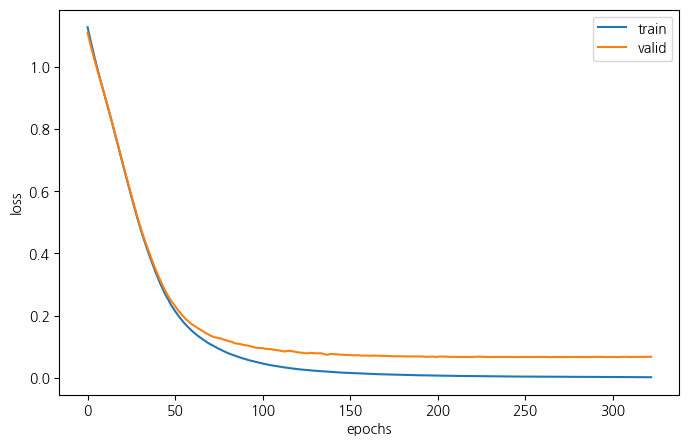

In [18]:
# 모델 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 콜백 설정
early_stop = EarlyStopping(patience=50)


# 파일 저장 포맷
filepath = "./model/whitewine_loss:{val_loss:04f}__{epoch:04d}.keras"  

# 체크포인트 콜백
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)

# 모델 학습
history = model.fit(
    mms_X_train ,y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(mms_X_test , y_test),
    callbacks=[early_stop, model_save]
)

# 학습 결과 시각화
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "valid"])  
plt.show()

# 머신러닝 스케일러와 모델 저장하기

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [56]:
data = pd.read_csv("./data/wine_train.csv")
data

,와인_종류,알코올_도수,사과산_함량,재_함량,재의_알칼리도,마그네슘_함량,총_페놀_함량,플라보노이드_함량,비플라보노이드_페놀_함량,프로안토시아닌_함량,색_강도,색조,희석_와인의_투과율_OD280_OD315,프롤린_함량
0,1,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235
1,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
2,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
3,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
4,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352
102,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510
103,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
104,2,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463


In [24]:
data['와인_종류'].value_counts()

와인_종류
2    42
1    35
3    29
Name: count, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [58]:
X = data.drop('와인_종류', axis=1)
y = data['와인_종류']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.4, stratify=y, random_state=42)

In [60]:
mms = MinMaxScaler()
train_temp = mms.fit_transform(X_train)
test_temp = mms.transform(X_test)
mms_X_train = pd.DataFrame(train_temp, columns= X_train.columns, index= X_train.index)
mms_X_test = pd.DataFrame(test_temp, columns= X_test.columns, index= X_test.index)

In [29]:
import joblib

In [30]:
joblib.dump(mms, "./model/MinMax_info2.joblib")

['./model/MinMax_info2.joblib']

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=1, random_state=42)
rfc.fit(mms_X_train, y_train)
pred = rfc.predict(mms_X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        17
           3       0.92      1.00      0.96        12

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



In [62]:
joblib.dump(rfc, "./model/rfc_model.joblib")

['./model/rfc_model.joblib']